In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
data = pd.read_csv('ex2data2.txt', header=None)
x = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [24]:
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


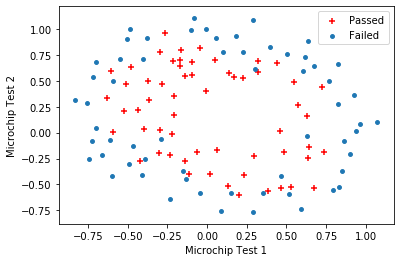

In [25]:
pos, neg = (y == 1), (y == 0)

plt.scatter(x[pos, 0], x[pos, 1], color = 'r', marker = '+')
plt.scatter(x[neg, 0], x[neg, 1], s = 15)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(('Passed', 'Failed'))

In [26]:
def mapFeatures(x1, x2, degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    #out = np.ones(len(x1)).reshape(len(x1), 1)
    out = np.ones((len(x1),1))
    for i in range (1, degree + 1):
        for j in range (i + 1):
            terms = (x1 ** (i-j) * x2 ** j).reshape(len(x1), 1)
            out = np.hstack((out, terms))
    
    return out

In [27]:
X = mapFeatures(x[:, 0], x[:, 1], 6)
Y = y[:, np.newaxis]
(m, n) = X.shape
theta = np.zeros((n, 1))

# Set regularization parameter lambda
Lambda = .08

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunctionReg(X, y, theta, Lambda):
    y_pred = sigmoid(X @ theta)
    error = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
    cost = 1/m * np.sum(error)
    regCost = cost + Lambda/(2*m) * np.sum(theta ** 2)
    
    grad_0 = 1/m * (X.T @ (y_pred - y))[0]
    grad_1 = 1/m * (X.T @ (y_pred - y))[1:] + (Lambda/m) * theta[1:]
    gradient = np.vstack((grad_0[:, np.newaxis], grad_1))
    
    return regCost, gradient

J, gradient = costFunctionReg(X, Y, theta, Lambda)
print('Cost at initial theta (zeros): '+ str(J))

Cost at initial theta (zeros): 0.6931471805599454


In [29]:
def gradientDescent(X, y, theta, alpha, iterations, Lambda):
    J_history = []
    for i in range (iterations):
        cost, gradient = costFunctionReg(X, y, theta, Lambda)
        theta = theta - (alpha * gradient)
        J_history.append(cost)
        
    return theta, J_history

alpha = 1
iterations = 1500
theta1, J_history = gradientDescent(X, Y, theta, alpha, iterations, Lambda)
print('Theta:\n'+ str(theta1))
print('\nCost at optimized theta: '+ str(J_history[-1]) )

Theta:
[[ 2.83297663]
 [ 1.90941019]
 [ 3.0307672 ]
 [-4.33888536]
 [-3.42207941]
 [-4.31994964]
 [ 0.77819343]
 [-1.19046049]
 [-0.6640681 ]
 [-0.37843981]
 [-3.43905312]
 [ 0.37319203]
 [-1.82895106]
 [-1.25431462]
 [-2.84687915]
 [-0.58497113]
 [-0.53284198]
 [ 0.45163775]
 [-1.10540262]
 [-1.21586062]
 [-0.18397144]
 [-2.7227003 ]
 [ 0.3894512 ]
 [-0.7951603 ]
 [ 0.31877571]
 [-1.11670758]
 [-0.94257965]
 [-1.3260097 ]]

Cost at optimized theta: 0.38872280376570995


Text(0.5, 1.0, 'Cost function using Gradient Descent')

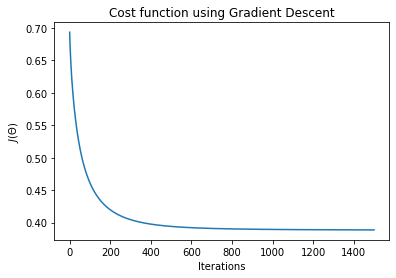

In [30]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

## Plotting Decision Boundary

In [31]:
def mapFeaturePlot(x1, x2, degree):
    out = np.ones(1)
    for i in range (1, degree+1):
        for j in range (i+1):
            terms = (x1 ** (i-j) * x2 ** j)
            out = np.hstack((out, terms))
    return out

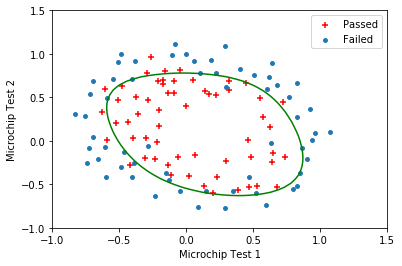

In [32]:
plt.scatter(X[pos, 1], X[pos, 2], color = 'r', marker = '+')
plt.scatter(X[neg, 1], X[neg, 2], s = 15)

#Plotting decision boundary

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = mapFeaturePlot(u[i], v[j], 6) @ theta1
        
plt.contour(u, v, z, 0, colors = 'g')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(('Passed', 'Failed'))

## Accuracy of Model

In [33]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    return acc * 100

print('Training Accuracy = '+ str(accuracy(X, Y, theta1, 0.5)) + ' %')

Training Accuracy = 83.89830508474576 %
